In [1]:
from __future__ import division, print_function

In [2]:
import numpy as np

In [5]:
from collections import defaultdict

In [37]:
def rating():
    r = np.random.rand()
    if r > 0.8:
        return 'upp'
    if r > 0.2:
        return 'mid'
    if r > 0.05:
        return 'low'
    return 'bot'

def random_assignment(L):
    '''
    The assumed distribution is:
        `upp` - 20% from exceeds expectations
        `mid` - 80% from meets expectations
        `low` - 15% from meets most expectations
        `bot` - 05% from does not meet expectations
    '''
    ls = []
    for _ in range(L):
        ls.append(rating())
    return ls

def compact_seq(seq):
    key_as_nums = {'low': 0, 'mid': 0, 'upp': 0, 'bot': 0}
    for a in seq:
        key_as_nums[a] += 1
    return key_as_nums

def convert_key(counts):
    '''
    '''
    key = sorted(counts.items(), key=lambda k: k[0])
    return '-'.join(['{0}{1}'.format(k, n) for k, n in key])

In [61]:
N_samples = 10000
team_size = 50
full_seqs = []
dist_counter = defaultdict(int)
for i in range(N_samples):
    seq = random_assignment(team_size)
    seq_counts = compact_seq(seq)
    full_seqs.append(seq_counts)
    dist_counter[convert_key(seq_counts)] += 1
dist_counter = dict(dist_counter)
for k, val in dist_counter.items():
    dist_counter[k] = val / N_samples

In [66]:
def breakdown_seqs(seqs):
    
    L = np.sum(seqs[0].values())
    N = len(seqs)
    atleast_lows = dict((i, 0) for i in range(L+1))
    atleast_upps = dict((i, 0) for i in range(L+1))
    for s in seqs:
        low_val = s['low'] + s['bot']
        upp_val = s['upp']
        for cut in range(low_val+1):
            atleast_lows[cut] += 1 / N
        for cut in range(upp_val+1):
            atleast_upps[cut] += 1 / N
    return filter(lambda (k, v): v > 0, atleast_lows.items()), filter(lambda (k, v): v > 0, atleast_upps.items())
    

In [67]:
breakdown_seqs(full_seqs)

([(0, 0.9999999999999062),
  (1, 0.9999999999999062),
  (2, 0.9998999999999062),
  (3, 0.9991999999999063),
  (4, 0.9945999999999068),
  (5, 0.9808999999999083),
  (6, 0.9520999999999115),
  (7, 0.8953999999999177),
  (8, 0.810699999999927),
  (9, 0.6901999999999403),
  (10, 0.5488999999999559),
  (11, 0.40849999999997133),
  (12, 0.2835999999999851),
  (13, 0.18399999999999606),
  (14, 0.11180000000000218),
  (15, 0.06180000000000074),
  (16, 0.029699999999999876),
  (17, 0.014899999999999965),
  (18, 0.005800000000000002),
  (19, 0.0026999999999999993),
  (20, 0.0010000000000000002),
  (21, 0.0006000000000000001)],
 [(0, 0.9999999999999062),
  (1, 0.9999999999999062),
  (2, 0.9997999999999062),
  (3, 0.9992999999999063),
  (4, 0.9939999999999068),
  (5, 0.9808999999999083),
  (6, 0.9525999999999114),
  (7, 0.8943999999999178),
  (8, 0.8098999999999271),
  (9, 0.6949999999999398),
  (10, 0.5593999999999547),
  (11, 0.41379999999997075),
  (12, 0.29019999999998436),
  (13, 0.1817999999

In [58]:
sort_labels = sorted(dist_counter.items(), key=lambda k: k[1], reverse=True)

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

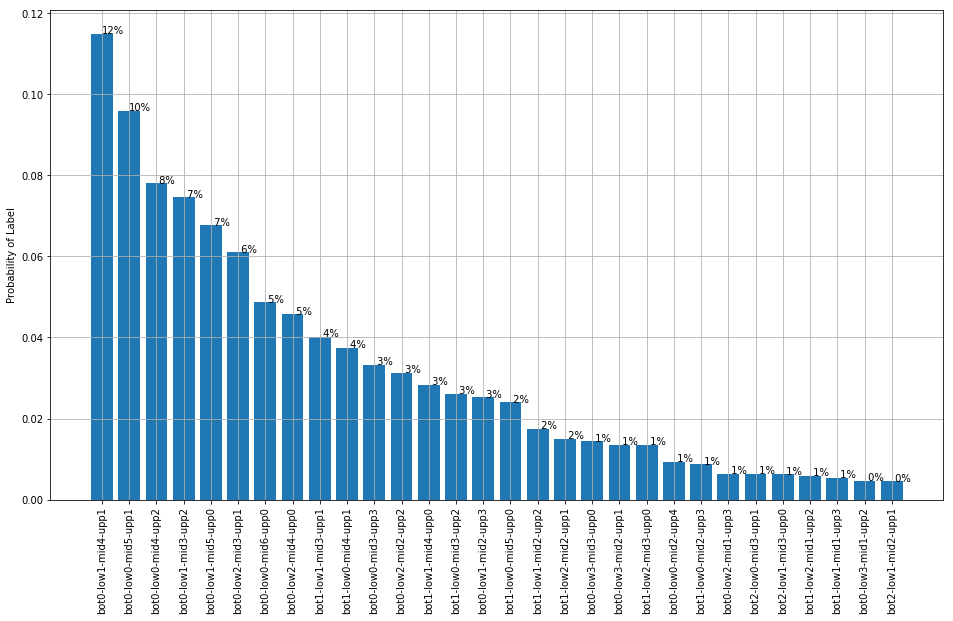

In [60]:
fig, ax = plt.subplots(figsize=(16,9))
labels, vals = zip(*sort_labels[:30])
locs = range(len(vals))
ax.bar(locs, vals, tick_label=labels)
for loc, val in zip(locs, vals):
    ax.text(loc, val, '{0:2.0f}%'.format(val*100))
plt.xticks(rotation=90)
ax.set_ylabel('Probability of Label')
ax.grid()